<a href="https://colab.research.google.com/github/jxf433/PhD-Project/blob/main/jxf433_Project%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Take-home project 1

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nekrut/bda/blob/main/Projects/Project%201.ipynb)

Write your PSU email address here: jxf433@Psu.edu

Share the notebook with aun1@psu.edu

## Load the data

In [21]:
import pandas as pd

variants = pd.read_csv(
    "https://raw.githubusercontent.com/nekrut/bda/main/data/pf_variants.tsv",
    sep="\t"
)

variants.head()

,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,EFFECT,IMPACT,GENE,AA_POS,HGVS_C,HGVS_P
0,ERR042228.fq,NC_004318.2,657697,T,C,324.0,14,0.857143,0,"1,0,13,0",intergenic_region,MODIFIER,PF3D7_0414500-PF3D7_0414600,-1,n.657697T>C,NaN
1,ERR042228.fq,NC_004318.2,658447,A,G,453.0,32,0.718750,11,"5,1,10,16",intergenic_region,MODIFIER,PF3D7_0414500-PF3D7_0414600,-1,n.658447A>G,NaN
2,ERR042228.fq,NC_004318.2,659163,C,A,1928.0,56,0.982143,0,"0,0,21,35",missense_variant,MODERATE,PF3D7_0414600,55,c.165G>T,p.Glu55Asp
3,ERR042228.fq,NC_004318.2,659167,C,T,1887.0,56,0.964286,0,"0,0,21,35",missense_variant,MODERATE,PF3D7_0414600,54,c.161G>A,p.Cys54Tyr
4,ERR042228.fq,NC_004318.2,660292,T,C,104.0,34,0.176471,0,"6,8,2,4",intergenic_region,MODIFIER,PF3D7_0414600-PF3D7_0414700,-1,n.660292T>C,NaN


## Instructions

Our goal is to understand whether the malaria parasite ([*Plasmodium falciparum*](https://brc-analytics.dev.clevercanary.com/data/organisms/5833)) infecting these individuals is resistant to [Pyrimethamine](https://en.wikipedia.org/wiki/Pyrimethamine)---an antimalarial drug. Resistance to Pyrimethamine is conferred by a mutation in `PF3D7_0417200` (*dhfr*) gene [Cowman1988](https://doi.org/10.1073/pnas.85.23.9109). Given sequencing data from four individuals we will determine which one of them is infected with a *Plasmodium falciparum* carrying mutations in this gene.

Variant calls in the provided Pandas data frame represent analysis of four samples: two from Ivory Coast and two from Colombia:

| Accession | Location |
|------------|------------|
| [ERR636434](https://www.ncbi.nlm.nih.gov/sra/?term=ERR636434) | Ivory coast |
| [ERR636028](https://www.ncbi.nlm.nih.gov/sra/?term=ERR636028) | Ivory coast |
| [ERR042232](https://www.ncbi.nlm.nih.gov/sra/?term=ERR042232) | Colombia |
| [ERR042228](https://www.ncbi.nlm.nih.gov/sra/?term=ERR042228) | Colombia |

These accessions correspond to datasets stored in the [Sequence Read Archive](https://www.ncbi.nlm.nih.gov/sra) at NCBI.

(data from [MalariaGen](https://www.malariagen.net/data_package/open-dataset-plasmodium-falciparum-v70/) )

## Specifics

- Filter variants falling within the *dhfr* gene
- Restrict variants to missense variants only using the effect column.
- You are specifically interested in variant at amino acid position 108
- Create a graph that shows samples vs variant coordinates, in which graph marks are proportional to alternative allele frequencies (**AF** column)
- Create a graph showing a world map in which allele frequencies of these two samples are represented as pie charts within the map of Colombia and within the map of Ivory Coast.  to be more specific, for each location you have two samples. Each of these samples will have an allele frequency at the resistance side. Use these allele frequencies as areas on the pie chart

> You can use any AI you want (preferably the one integrated in Colab) but you will never get exactly what you want, so you will have to adjust it. You will have to explain to me what the steps were.


In [22]:
#filter variants in the dhfr gene
dhfr = variants[variants["GENE"] == "PF3D7_0417200"]


In [23]:
#keep only missense variants
dhfr_missense = dhfr[dhfr["EFFECT"] == "missense_variant"]


In [24]:
#focus on amino acid position 108
dhfr_108 = dhfr_missense[dhfr_missense["AA_POS"] == 108].copy()

print("dhfr missense variants at AA_POS=108:")
display(dhfr_108)


dhfr missense variants at AA_POS=108:


,Sample,CHROM,POS,REF,ALT,QUAL,DP,AF,SB,DP4,EFFECT,IMPACT,GENE,AA_POS,HGVS_C,HGVS_P
147,ERR042228.fq,NC_004318.2,748410,G,A,2335.0,70,0.957143,0,"0,0,30,40",missense_variant,MODERATE,PF3D7_0417200,108,c.323G>A,p.Ser108Asn
830,ERR636028.fq,NC_004318.2,748410,G,A,8292.0,233,0.991416,0,"0,0,112,121",missense_variant,MODERATE,PF3D7_0417200,108,c.323G>A,p.Ser108Asn


In [30]:
#merge in country labels for later plots
sample_meta = pd.DataFrame({
    "Sample": ["ERR636434", "ERR636028", "ERR042232", "ERR042228"],
    "Location": ["Ivory coast", "Ivory coast", "Colombia", "Colombia"]
})

dhfr_108 = dhfr_108.merge(sample_meta, on="Sample", how="left")

In [39]:
#if a sample doesn't appear in dhfr_108, then no AA108 missense variant was detected.
af_table = (dhfr_108.groupby(["Sample", "Location"], as_index=False)
            .agg(AF=("AF", "max"), POS=("POS", "first"), HGVS_P=("HGVS_P", "first"), HGVS_C=("HGVS_C", "first")))

/tmp/ipython-input-1632644462.py:3: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  .agg(AF=("AF", "max"), POS=("POS", "first"), HGVS_P=("HGVS_P", "first"), HGVS_C=("HGVS_C", "first")))


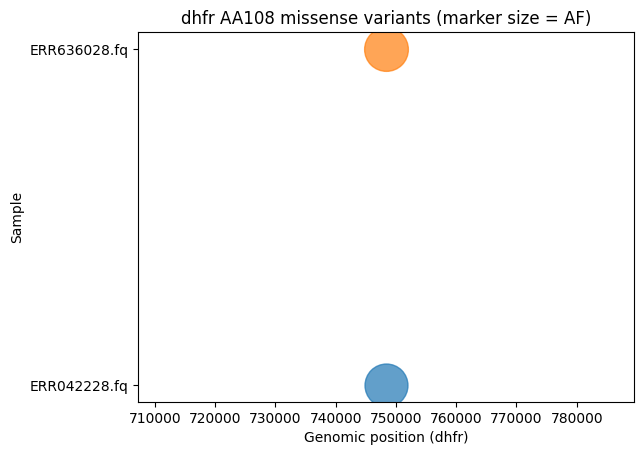

In [43]:
#plot samples vs genomic coordinates
import matplotlib.pyplot as plt

plt.figure()
for sample, df in dhfr_108.groupby("Sample"):
    plt.scatter(
        df["POS"],
        [sample] * len(df),
        s=df["AF"] * 1000,   # scale marker size
        alpha=0.7
    )

plt.xlabel("Genomic position (dhfr)")
plt.ylabel("Sample")
plt.title("dhfr AA108 missense variants (marker size = AF)")
plt.show()


In [44]:
#extract allele frequencies per sample
af_by_sample = (
    dhfr_108[["Sample", "AF"]]
    .set_index("Sample")
    .to_dict()["AF"]
)

af_by_sample


{'ERR042228.fq': 0.957143, 'ERR636028.fq': 0.991416}

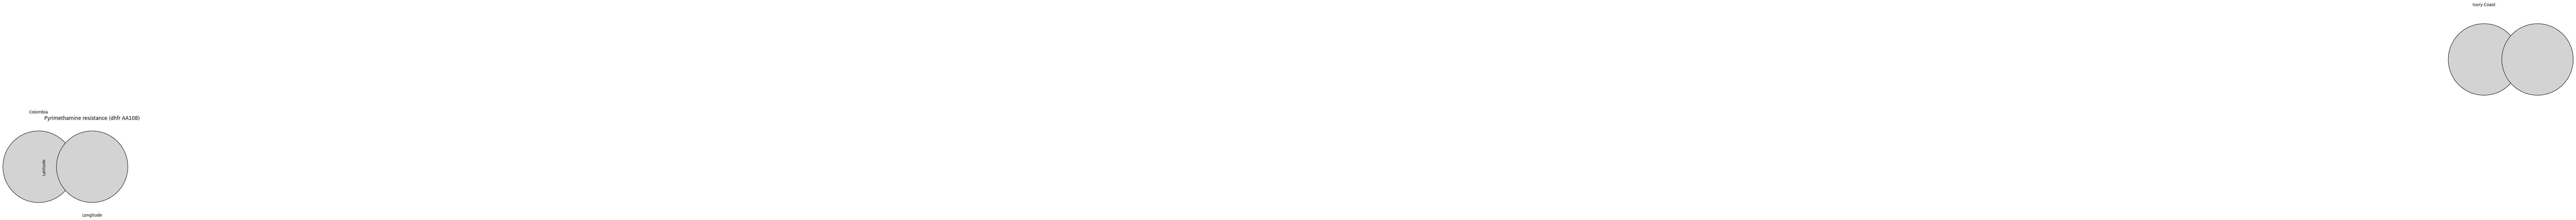

In [45]:
#two pies per country, one per sample
fig, ax = plt.subplots(figsize=(8, 4))

# Country coordinates (approximate)
locations = {
    "Ivory Coast": {"lat": 7.5, "lon": -5.5,
                    "samples": ["ERR636434", "ERR636028"]},
    "Colombia": {"lat": 4.5, "lon": -74.0,
                 "samples": ["ERR042232", "ERR042228"]}
}

# Draw background
ax.set_xlim(-90, 10)
ax.set_ylim(-10, 15)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Pyrimethamine resistance (dhfr AA108)")

for loc, info in locations.items():
    lat, lon = info["lat"], info["lon"]
    samples = info["samples"]

    for i, s in enumerate(samples):
        af = af_by_sample.get(s, 0)
        sizes = [af, 1 - af]

        ax.pie(
            sizes,
            center=(lon + i * 1.5, lat),
            radius=1.0,
            colors=["red", "lightgray"],
            wedgeprops=dict(edgecolor="black")
        )

    ax.text(lon, lat + 1.5, loc, ha="center")

plt.show()
